In [9]:
from musixmatch import Musixmatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import math

!pip install textblob
# !pip install 


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\James Seelos\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## Get API

In [4]:
# INSERT YOUR API KEY HERE FOR MUSIXMATCH
# THIS API KEY WILL NOT WORK
API_KEY = 'dcb0975c00d306339f16d7e13badb7b9'

musixmatch = Musixmatch(API_KEY)

## Get Dataframe

In [5]:
top100 = pd.read_csv('C:/Users/James Seelos/Documents/USU/CS6830/cs5830_Project_3/BillboardTop100.csv')
top100.head()

,Year,Ranking,Song Name,Artist
0,2022,1,“Heat Waves“,Glass Animals
1,2022,2,“As It Was“,Harry Styles
2,2022,3,“Stay“,The Kid Laroi and Justin Bieber
3,2022,4,“Easy on Me“,Adele
4,2022,5,“Shivers“,Ed Sheeran


## Put API data into dataframe

In [10]:
# WILL NOT WORK UNLESS VALID API KEY IS PRESENT
tracks_list = []

for index, row in top100.iterrows():
  tracks_list.append(musixmatch.track_search(q_track=row['Song Name'], q_artist=row['Artist'], page_size=0, page=1, s_track_rating='desc'))

In [ ]:
tracks = {
        'release_date': [],
        'track_id': [],
        'track_name': [],
        'track_rating': [],
        'artist_id': [],
        'artist_name': [],
        'album_id': [],
        'album_name': [],
        'genre': [],
        'lyrics': []
        }

for i in range(len(tracks_list)):
  if tracks_list[i]['message']['header']['status_code'] == 200:
    # print(tracks_list[i]['message'])
    if len(tracks_list[i]['message']['body']['track_list']) > 0:
      temp = tracks_list[i]['message']['body']['track_list'][0]['track']
      if(len(temp['primary_genres']['music_genre_list']) > 0):
        lyric = musixmatch.track_lyrics_get(temp['track_id'])
        album = musixmatch.album_get(temp['album_id'])
        # print(lyric)
        # print(album)
        # print()

        tracks['release_date'].append(album['message']['body']['album']['album_release_date'])
        tracks['track_id'].append(temp['track_id'])
        tracks['track_name'].append(temp['track_name'])
        tracks['track_rating'].append(temp['track_rating'])
        tracks['artist_id'].append(temp['artist_id'])
        tracks['artist_name'].append(temp['artist_name'])
        tracks['album_id'].append(temp['album_id'])
        tracks['album_name'].append(temp['album_name'])
        tracks['genre'].append(temp['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_name'])
        tracks['lyrics'].append(lyric['message']['body']['lyrics']['lyrics_body'])

tempdf = pd.DataFrame(data=tracks)
tempdf.head()

In [ ]:
tempdf.to_csv('Tracks.csv', index=False)

## Import new Database

In [6]:
df = pd.read_csv('C:/Users/James Seelos/Documents/USU/CS6830/cs5830_Project_3/Tracks.csv')
df.head()

,Unnamed: 0,release_date,track_id,track_name,track_rating,artist_id,artist_name,album_id,album_name,genre,lyrics
0,0,2020-08-07,196436953,Heat Waves,95,24444227,Glass Animals,37969119,Dreamland,Rock,"Last night, all I think about is you\r\nDon't ..."
1,1,2022-05-20,236191108,As It Was,99,24505463,Harry Styles,51528546,Harry's House,Pop,"Come on, Harry, we wanna say ""good night"" to y..."
2,2,2021-11-19,226562358,Easy On Me,91,346898,Adele,48110510,30,Pop,There ain't no gold in this river\r\nThat I've...
3,3,2021-10-29,223224367,Shivers,92,49581672,Ed Sheeran,46693321,=,Pop,I took an arrow to the heart\r\nI never kissed...
4,4,2022-05-06,235600884,First Class,84,28830691,Jack Harlow,51354010,Come Home The Kids Miss You,Pop,"Uh\r\n\r\nI been a (G), throw up the (L)\r\nSe..."


## Format Date

In [8]:
# convert to date
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.strftime('%Y')
df = df.sort_values(by='release_date')
df = df.iloc[7:]
df = df.dropna()
df.head()

,Unnamed: 0,release_date,track_id,track_name,track_rating,artist_id,artist_name,album_id,album_name,genre,lyrics,year
653,653,2011-01-01,113899101,Domino,79,12643094,Jessie J,23876226,Who You Are,Electronic,I'm feeling sexy and free\r\nLike glitter's ra...,2011
626,626,2011-01-01,16754121,Glad You Came,89,40536874,The Wanted,13910808,Battleground,Electronic,"The sun goes down, the stars come out\r\nAnd a...",2011
682,682,2011-01-01,33550976,Love You Like a Love Song,85,37244230,Selena Gomez & The Scene,15459640,When the Sun Goes Down (Deluxe Edition),Electronic,It's been said and done\r\nEvery beautiful tho...,2011
681,681,2011-01-01,164641026,Red Solo Cup,69,8189,Toby Keith,31311394,Clancy's Tavern,Traditional Country,"One two three\r\nNow, red solo cup is the best...",2011
660,660,2011-01-01,15090125,Springsteen,77,230781,Eric Church,13862966,Chief,Contemporary Country,"To this day, when I hear that song\r\nI see yo...",2011


## What artists appear the most on the charts

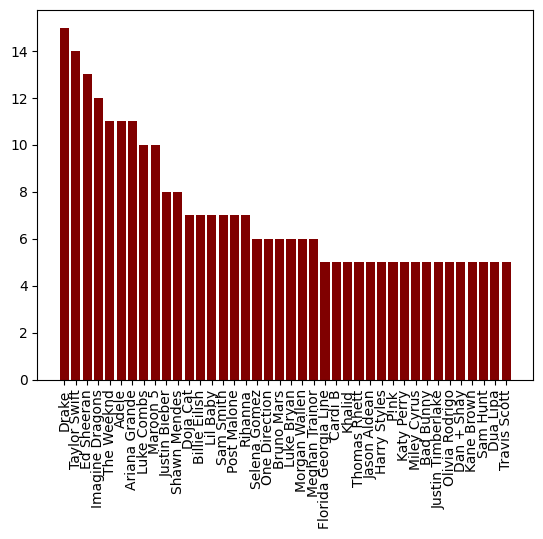

In [10]:
a = df.artist_name.value_counts().head(40)
a.index
a.values
plt.bar(a.index, a.values, color ='maroon',
    )
plt.xticks(rotation=90)
# plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [12]:
## What genres are the most common by year

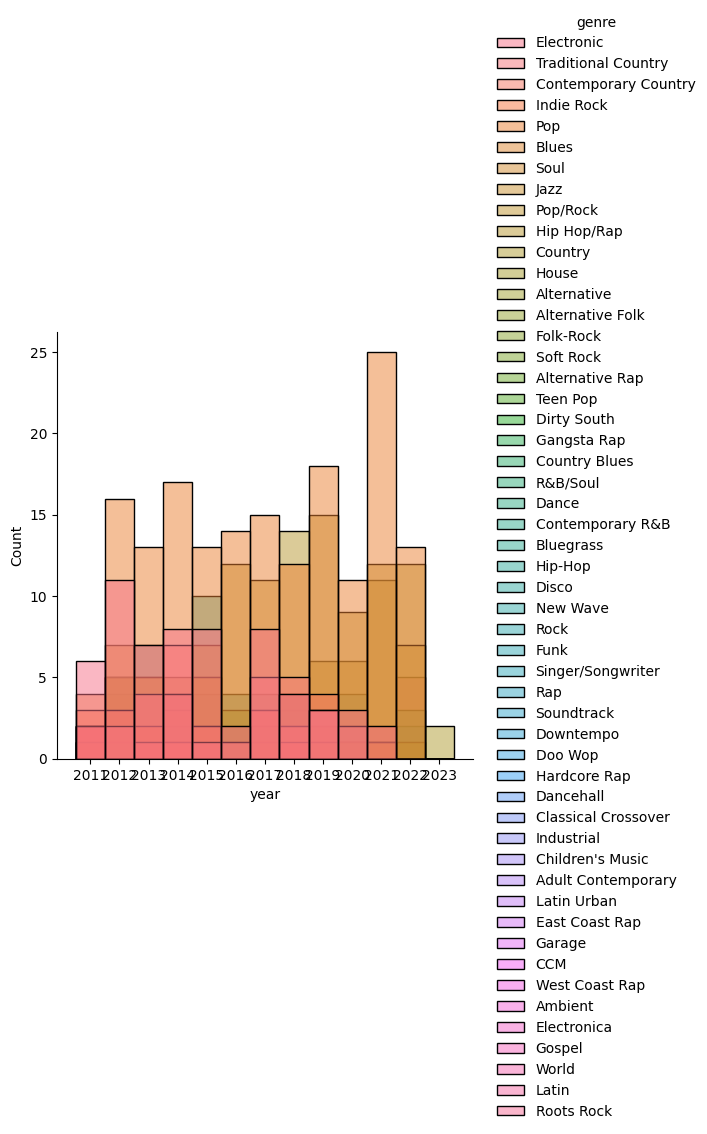

In [11]:
sns.displot(data=df, x='year', hue='genre')